In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys

sys.path.append("../")

from depo.functions import Functions as func
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dttt1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_train = func.open_file('dataSet.zip/train.csv')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [3]:
df_train.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df_train = df_train.drop('id', axis=1)

In [5]:
# Check if there is any null value
df_train.print_nan_columns()

,Missing Values,% Missing Values,Zero Values,% Missing Values,Zero Missing Values,% Zero Missing Values,Data Type
text,0,0.0,0,0.0,0,0.0,object
genre,0,0.0,0,0.0,0,0.0,object
Total,0,0.0,0,0.0,0,0.0,-


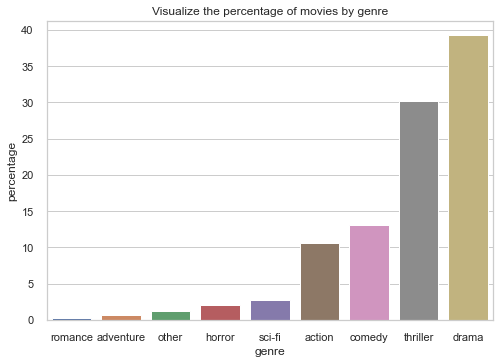

In [6]:
# Plots percentage by genre
df_perc = (df_train["genre"].value_counts() / len(df_train)) * 100
df_perc.sort_values(inplace=True)  

df_perc = df_perc.to_frame()
df_perc.columns = ['percentage']
df_perc.index.names = ['genre']
df_perc['genre'] = df_perc.index

import seaborn as sns
import pylab as plt

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'genre', y = 'percentage', data=df_perc)
plt.title('Visualize the percentage of movies by genre')
plt.show()


In [7]:
# Maps the genres to value
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df_train['genre_index'] = df_train['genre'].map(genre_mapper)
df_train.head(10)

,text,genre,genre_index
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8
1,"t, summa cum laude and all. And I'm about to l...",comedy,3
2,"up Come, I have a surprise.... She takes him ...",drama,4
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8
4,"nd dismounts, just as the other children reach...",drama,4
5,breadth of the bluff. Gabe pulls out his ancie...,thriller,8
6,uilding. A MAN in pajamas runs out into the ra...,thriller,8
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama,4
8,"Memphis goes back into the garage, Budgy cack...",thriller,8
9,e reels as the world spins. Sweat pours off hi...,action,1


In [8]:
# Gets Streammed words by tokens without special caracters and lower case 
corpus = df_train['text'].get_stemme_text()

In [9]:
# Creates a classification of the corpus created
df_movies_genres = pd.DataFrame(columns=['text', 'genre', 'genre_index'])

df_unique = df_train.drop_duplicates(['genre','genre_index'])[['genre','genre_index']]
df_unique = df_unique.sort_values(by = 'genre_index', ascending=True).reset_index(drop=True)

for i in range(0, len(df_unique)):
    for j in list(df_train[df_train['genre_index']== df_unique['genre_index'][i]].index):
        text = corpus[j]
        genre = df_unique['genre'][i]
        genre_index = df_unique['genre_index'][i]
        
        df_movies_genres = df_movies_genres.append({'text': text
                                                  , 'genre': genre 
                                                  , 'genre_index': genre_index}, ignore_index=True) 

df_movies_genres.head()

,text,genre,genre_index
0,wan oh god paus alright shake carlotta carlott...,other,0
1,ttle ad n white cadillac zimmermann rais machi...,other,0
2,origin artist suzann first michael look portra...,other,0
3,long coat ruffl shirt carlotta julien great gr...,other,0
4,ose littl boy voic sweetli santa jack spin aro...,other,0


In [10]:
# X receives the 10000 most frequency words used in the text
X = df_movies_genres['text'].get_bag_of_words(max_features=10000, ngram_range=(1,2))
y = df_movies_genres['genre'].values

In [11]:
# Splits the data by 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [12]:
# Checks which Machine Learning algorithms presents better results
func.print_models_scores(X_train, y_train, 10)

                          Model_name  Accuracy  F1_score    Recall  Precision
0  NaiveBayesMultinomialNBClassifier  0.700253  0.524510  0.526568   0.639734
1       NaiveBayesGaussianClassifier  0.602336  0.347036  0.338503   0.526873
2                 AdaBoostClassifier  0.400486  0.119059  0.152090   0.246923


In [21]:
## It is decided to use Ada boots classifier Bayes
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)

In [20]:
# Apply the model into searchCV to find the best params
model = { 'MultinomialNB': MultinomialNB() }

params = { 'MultinomialNB':  { 'alpha': [0.1, 0.2, 0.3, 0.4] } }

func.get_grid_searchCV_scores(model, params, X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
       estimator min_score mean_score max_score std_score alpha
0  MultinomialNB  0.904335   0.906439  0.908155  0.001583   0.1
1  MultinomialNB  0.901345   0.904999   0.90749   0.00264   0.2
2  MultinomialNB  0.897193   0.902176  0.905497  0.003588   0.3
3  MultinomialNB   0.89437   0.899131  0.901677  0.003369   0.4


In [22]:
# Fits the model
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 91.34%


In [26]:
cm = confusion_matrix(y_test, y_pred)

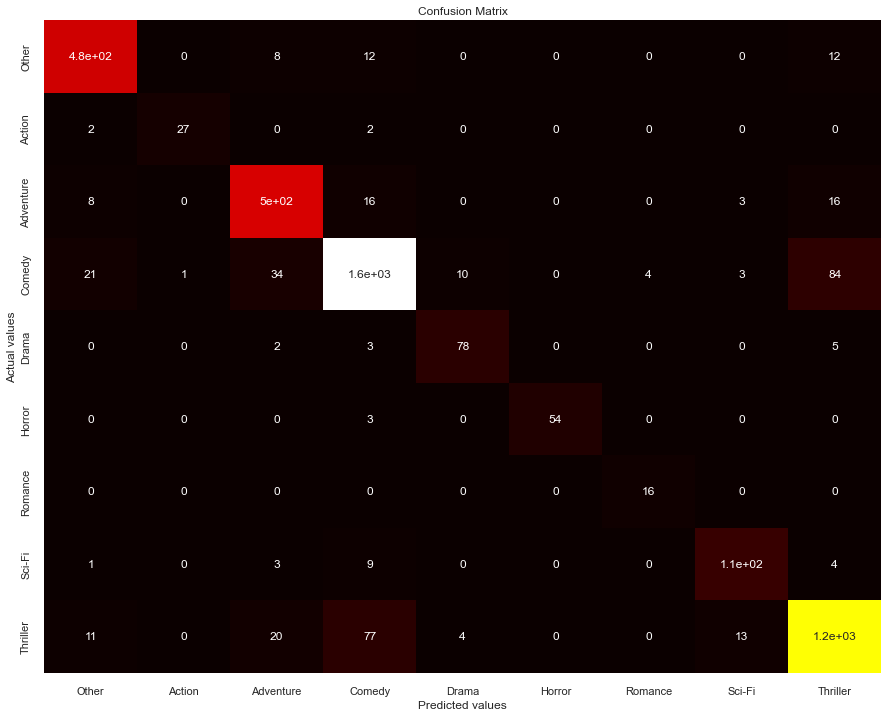

In [27]:
plt.figure(figsize=(15,12))
axis_labels = ['Other', 'Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi', 'Thriller']
sns.heatmap(data=cm, annot=True, cmap='hot', xticklabels=axis_labels, yticklabels=axis_labels,cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()